1 - Preparação dos dados

In [25]:
# Importando Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [26]:
# Carregar os dados do arquivo CSV
df = pd.read_csv('dadosacoes.csv')

In [27]:
df.head() 

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


2 - Exploração dos dados

In [32]:
# Verificar as colunas para garantir que os nomes estejam corretos
print(df.columns)

Index(['nome ação', 'preço ação R$', 'qtde cotas',
       'valor de mercado R$ -(Bilhões)'],
      dtype='object')


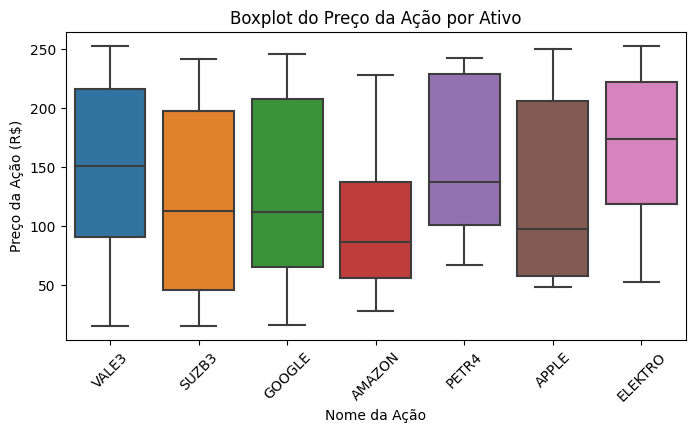

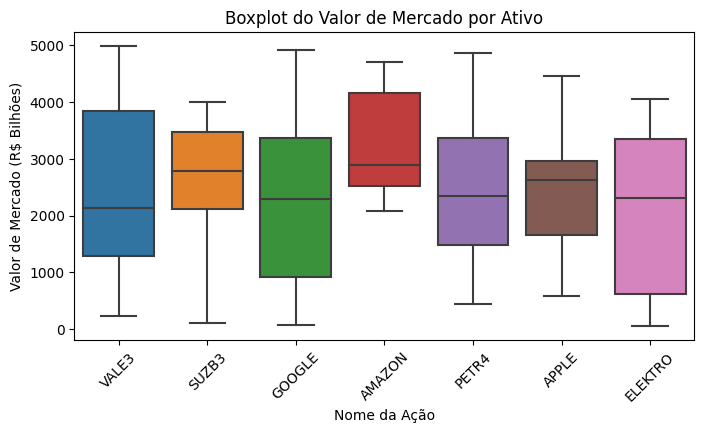

In [33]:
# Boxplot do preço da ação para cada ativo
plt.figure(figsize=(8, 4))
sns.boxplot(x='nome ação', y='preço ação R$', data=df)
plt.title('Boxplot do Preço da Ação por Ativo')
plt.xticks(rotation=45)
plt.xlabel('Nome da Ação')
plt.ylabel('Preço da Ação (R$)')
plt.show()

# Boxplot do valor de mercado para cada ativo
plt.figure(figsize=(8, 4))
sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=df)
plt.title('Boxplot do Valor de Mercado por Ativo')
plt.xticks(rotation=45)
plt.xlabel('Nome da Ação')
plt.ylabel('Valor de Mercado (R$ Bilhões)')
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [36]:
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


3 - Pré processamento dos dados

In [40]:
# Tratar valores ausentes (caso existam)
df['preço ação R$'].fillna(df['preço ação R$'].mean(), inplace=True)
df['qtde cotas'].fillna(df['qtde cotas'].mean(), inplace=True)
df['valor de mercado R$ -(Bilhões)'].fillna(df['valor de mercado R$ -(Bilhões)'].mean(), inplace=True)

# Verificando se há valores ausentes após o tratamento
df.isnull().sum()

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [41]:
# Codificar variáveis categóricas: Transformar a coluna 'nome ação' em variáveis dummy (True/False)
df = pd.get_dummies(df, columns=['nome ação'], drop_first=True)

# Verificando a mudança
df.head()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [42]:
# Selecionar apenas as colunas numéricas
df_numericos = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Utilizando o StandardScaler para normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalizados = scaler.fit_transform(df_numericos)

# Convertendo os dados normalizados de volta para DataFrame para facilitar o uso no K-means
df_normalizados = pd.DataFrame(df_normalizados, columns=df_numericos.columns)

# Verificando os dados normalizados
df_normalizados.head()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,0.772901,-0.256419,-0.215567
1,-0.602986,0.694636,0.456955
2,0.385515,-0.402735,0.274259
3,-1.070520,-0.658788,0.848240
4,1.013347,-1.573264,0.389343


4 - Utilizar o algoritmo K-means com n_clusters = 4 para agrupar as ações com base nas características :preço da ação, quantidade de cotas e valor de mercado

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


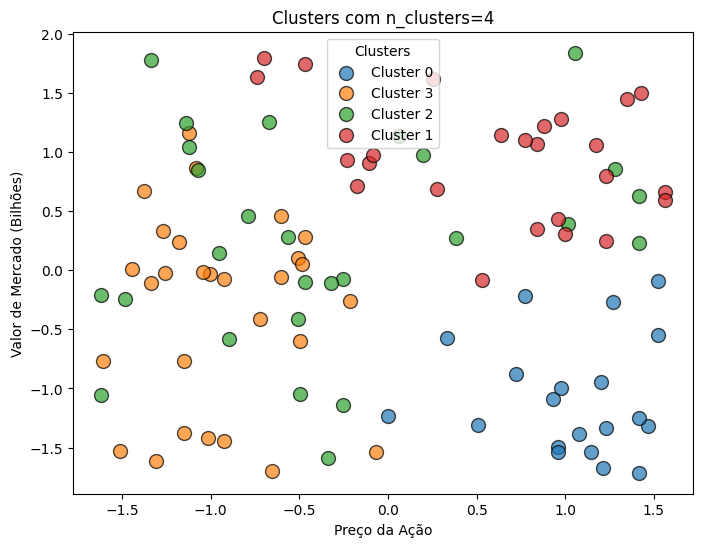

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means com n_clusters = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df_normalizados['Cluster_4'] = kmeans_4.fit_predict(df_normalizados)

# Visualizar os clusters formados
plt.figure(figsize=(8, 6))

# Iterando sobre os clusters e atribuindo cores com a paleta tab10
for i, cluster in enumerate(df_normalizados['Cluster_4'].unique()):
    cluster_data = df_normalizados[df_normalizados['Cluster_4'] == cluster]
    
    # Usando a paleta tab10 para atribuir cores aos clusters
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Clusters com n_clusters=4')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


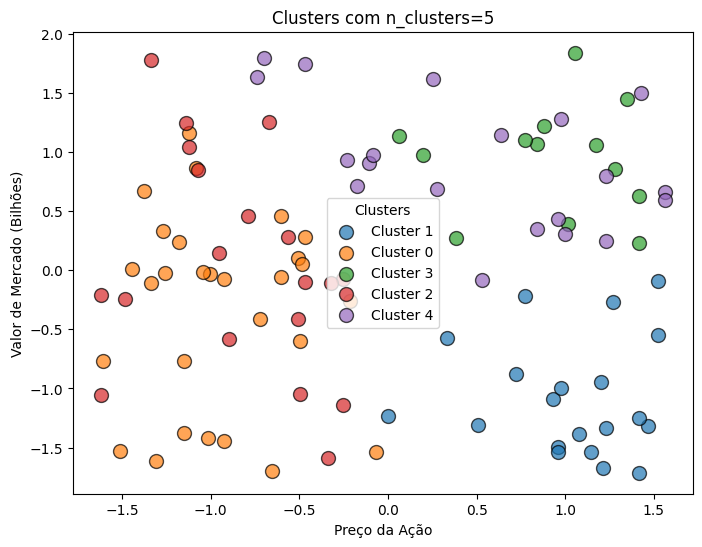

In [44]:
# K-means com n_clusters = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df_normalizados['Cluster_5'] = kmeans_5.fit_predict(df_normalizados)

# Visualizar os clusters formados
plt.figure(figsize=(8, 6))

# Iterando sobre os clusters e atribuindo cores com a paleta tab10
for i, cluster in enumerate(df_normalizados['Cluster_5'].unique()):
    cluster_data = df_normalizados[df_normalizados['Cluster_5'] == cluster]
    
    # Usando a paleta tab10 para atribuir cores aos clusters
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Clusters com n_clusters=5')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


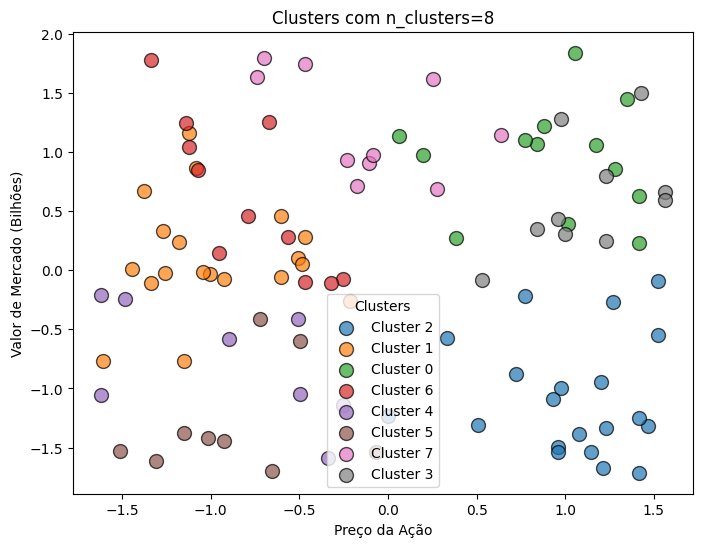

In [45]:
# K-means com n_clusters = 8
kmeans_8 = KMeans(n_clusters=8, random_state=42)
df_normalizados['Cluster_8'] = kmeans_8.fit_predict(df_normalizados)

# Visualizar os clusters formados
plt.figure(figsize=(8, 6))

# Iterando sobre os clusters e atribuindo cores com a paleta tab10
for i, cluster in enumerate(df_normalizados['Cluster_8'].unique()):
    cluster_data = df_normalizados[df_normalizados['Cluster_8'] == cluster]
    
    # Usando a paleta tab10 para atribuir cores aos clusters
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Clusters com n_clusters=8')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

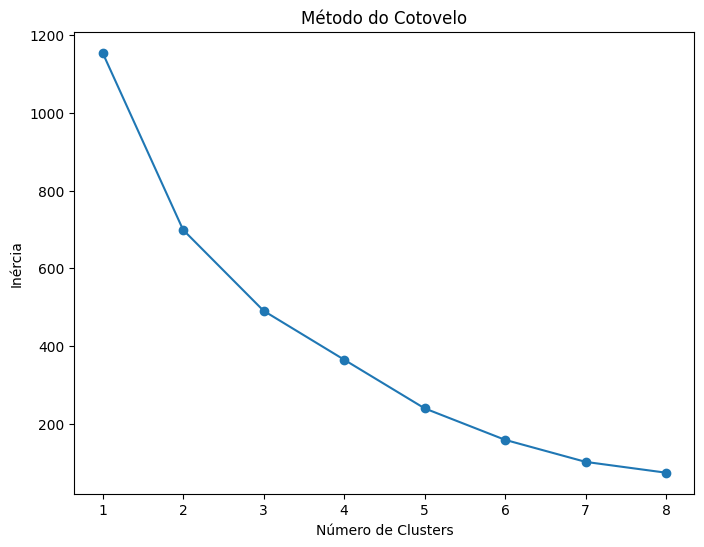

In [46]:
# Gráfico do Cotovelo (Elbow Method)
inertia = []
for n in range(1, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_normalizados)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

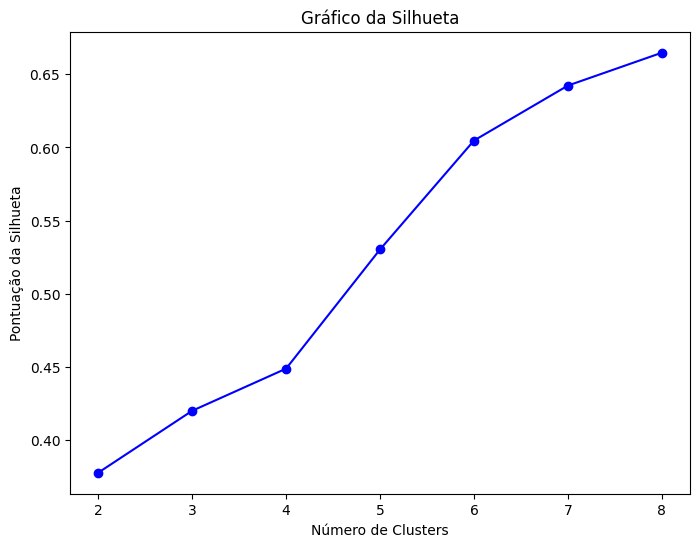

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Gráfico da Silhueta
silhouette_scores = []
for n in range(2, 9):  # A silhueta não é definida para 1 cluster
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(df_normalizados)
    silhouette_avg = silhouette_score(df_normalizados, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o', color='b')
plt.title('Gráfico da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()


5 - Plotar visualização dos clusters formados

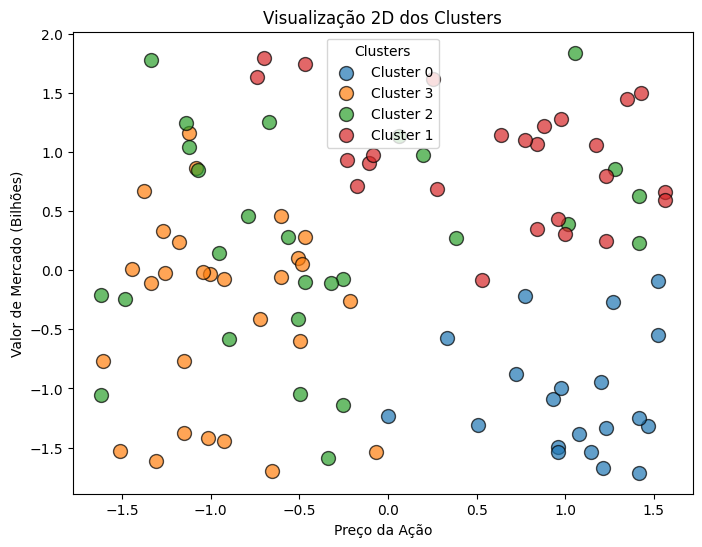

In [49]:
# Visualização 2D dos clusters formados
plt.figure(figsize=(8, 6))

# Iterando sobre os clusters e atribuindo cores a cada um
for i, cluster in enumerate(df_normalizados['Cluster_4'].unique()):
    cluster_data = df_normalizados[df_normalizados['Cluster_4'] == cluster]
    
    # Usando plt.cm.tab10 para gerar uma cor para cada cluster
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Visualização 2D dos Clusters')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


In [50]:
from sklearn.cluster import KMeans

# Selecionando as variáveis para clustering
X = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Aplicando o KMeans com n_clusters = 4 (ou 5 ou 8, conforme desejado)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans.fit_predict(X)

# Visualizando os dados com a coluna de clusters
print(df.head())


   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE  \
0            194          45                            2134            False   
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3  \
0              False             False            False            False   
1              False             False            False             True   
2              False             False            False             True   
3              False             False            False             True   
4              False              True            False            False   

   nome ação_VALE3  Cluster_4  
0             True      

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


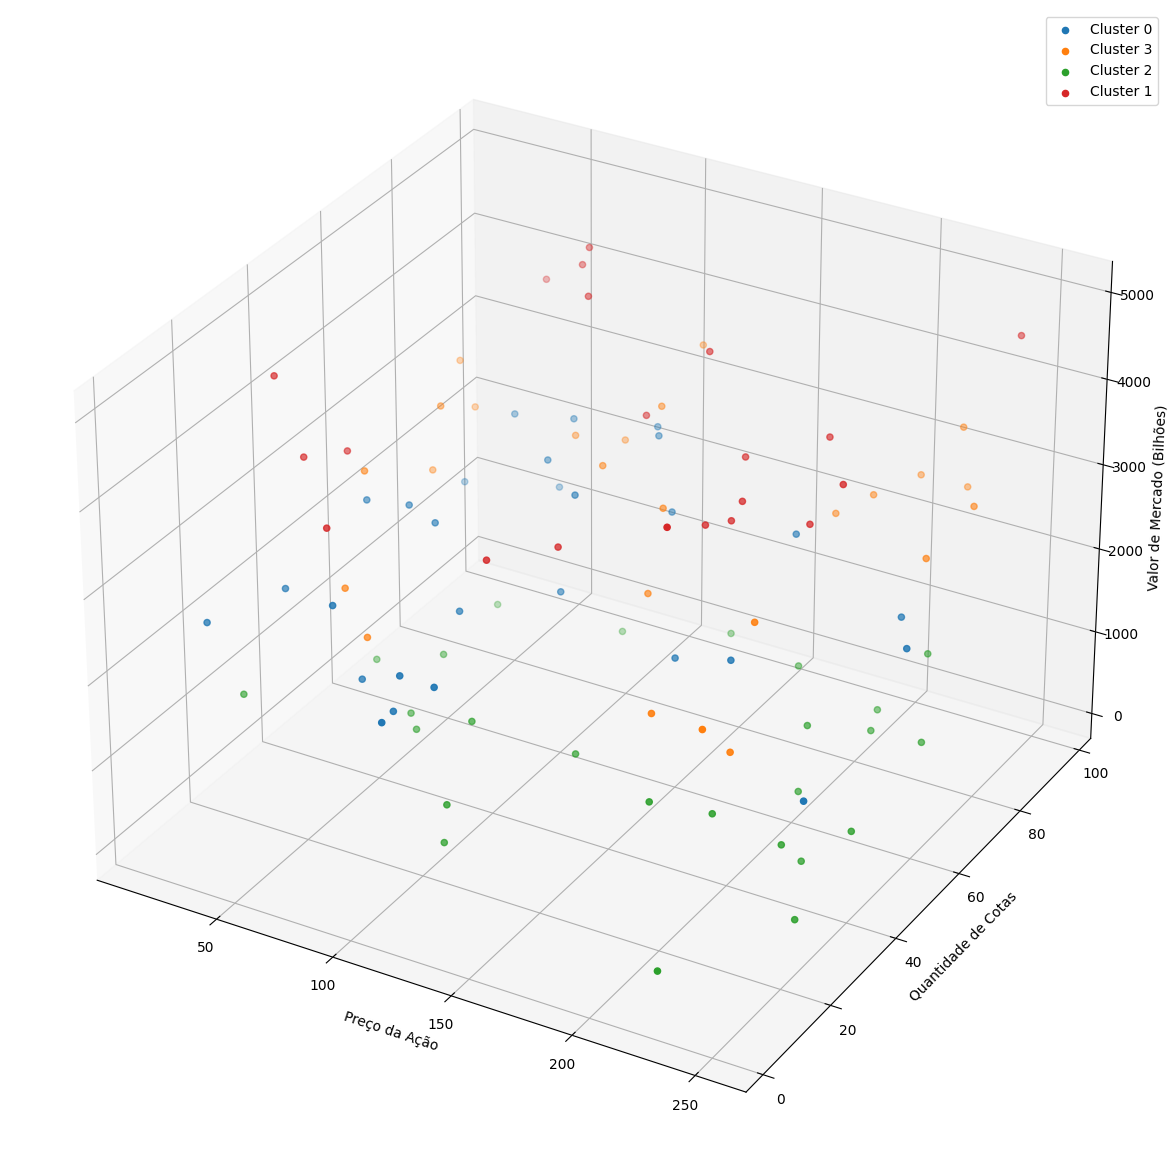

In [51]:
# Visualização 3D dos clusters formados
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Obtenha os clusters únicos
clusters = df['Cluster_4'].unique()

# Iterar sobre os clusters e plotar com cores distintas
for i, cluster in enumerate(clusters):
    cluster_data = df[df['Cluster_4'] == cluster]
    # Escolher uma cor padrão para cada cluster, por exemplo, 'C0', 'C1', etc. 
    ax.scatter(cluster_data['preço ação R$'], 
               cluster_data['qtde cotas'],
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10))  

# Adicionar títulos e rótulos aos eixos
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()


#5) Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado ?

A maior vantagem do aprendizado não supervisionado em relação ao aprendizado supervisionado é que ele não depende de dados rotulados, o que permite explorar grandes volumes de dados sem a necessidade de etiquetá-los previamente, facilitando a descoberta de padrões ocultos, agrupamentos e estruturas nos dados de forma automática e sem supervisão explícita.